##Attrition Analysis

Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading Attrition Dataset

In [2]:
df = pd.read_csv('general_data.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


Target variable is Attrition which is Binary Categorical

Shape of Dataset

In [3]:
df.shape

(4410, 24)

Checking Information of Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

Checking Null Columns

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Filling Null Values by mean and median

In [6]:
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(11.28) 
# 11.28 is the mean of TotalWorkingYears column 

df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(2)
# 2 is the median of NumCompaniesWorked

Check if all values are filled

In [7]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

#Ploting Histogram

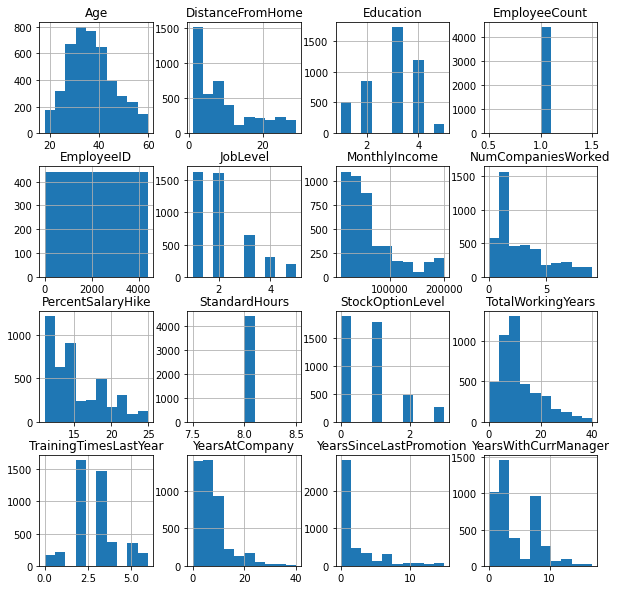

In [8]:
df.hist(figsize=(10,10))
plt.show()


Inference from Histogram:
1. Education, JobLevel, StockOptional Level are Categorical Variables which are in Encoded format
2. Standard Hours, Employee Count, Employee ID are irrelevent columns

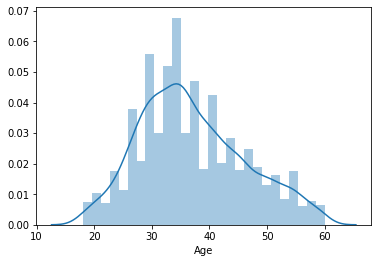

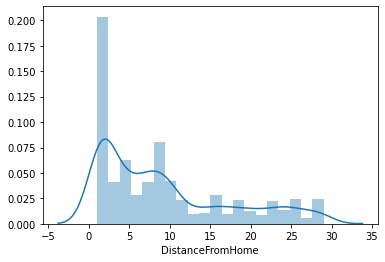

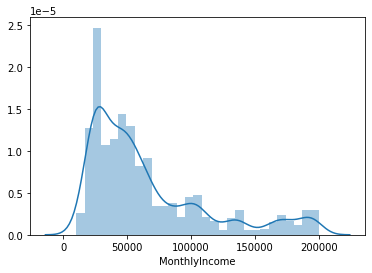

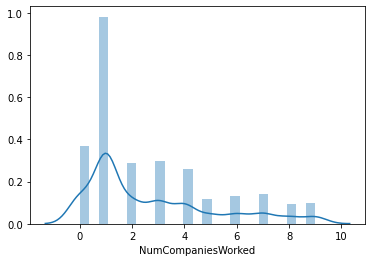

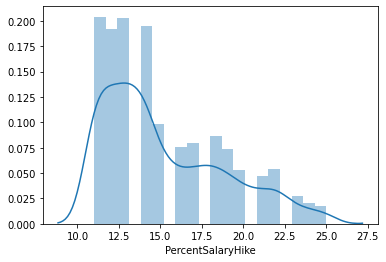

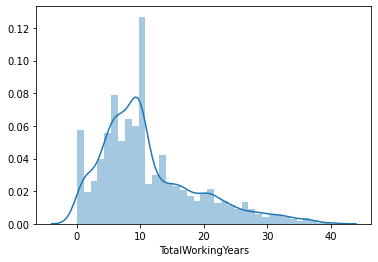

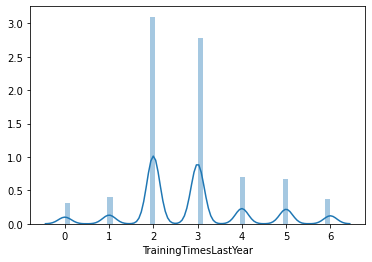

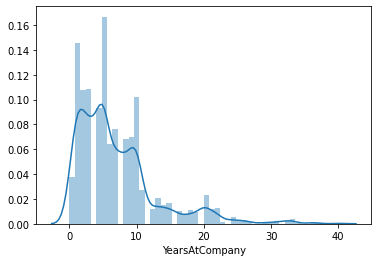

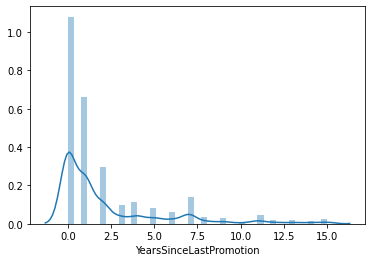

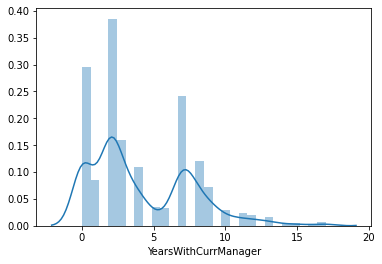

In [9]:

columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 
           'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in columns:
    sns.distplot(df[col])
    plt.show()

Inference from Distplot
1. Age, NumCompanies Worked, PercentSalaryHike, TotalWorking Years, YearsSinceLastPromotion is Unimodal
2. Distance from Home is Bimodal
3. Monthly Income, TrainingtimesLastYear, YearsAtCompany, YearswithCurrManager is Multimodal

Finding Outliers using Boxplot

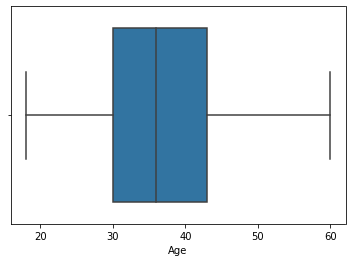

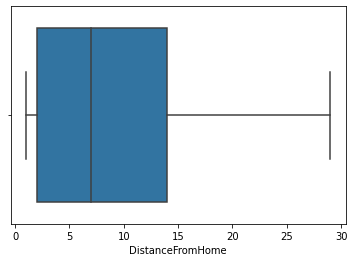

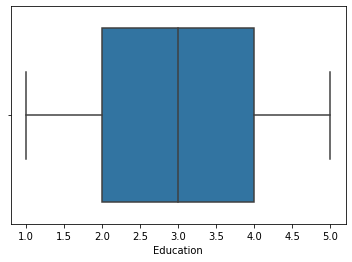

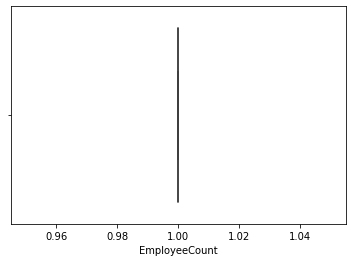

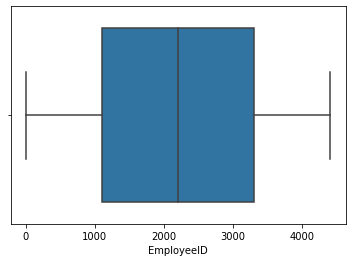

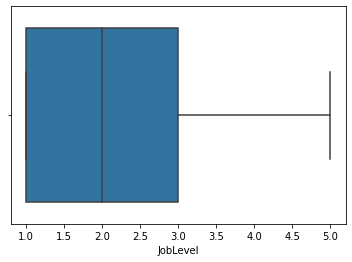

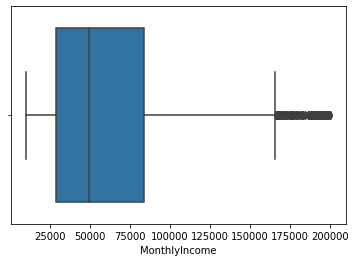

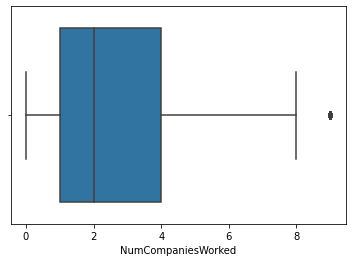

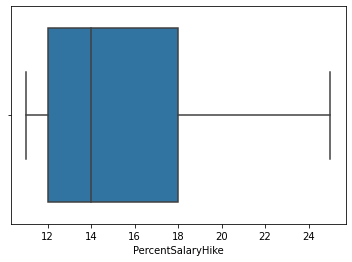

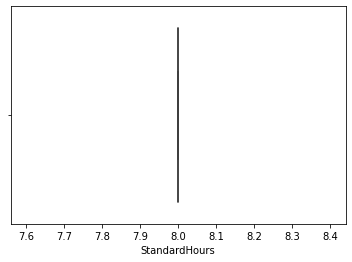

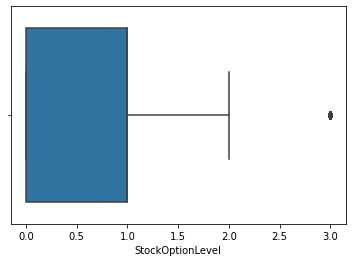

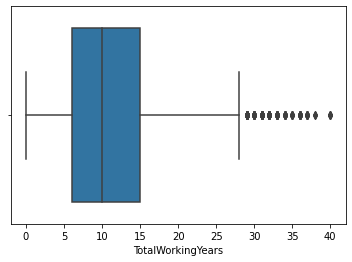

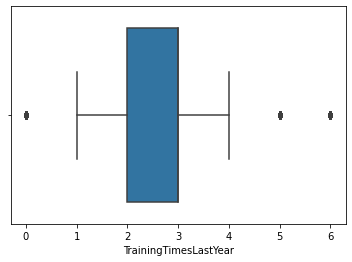

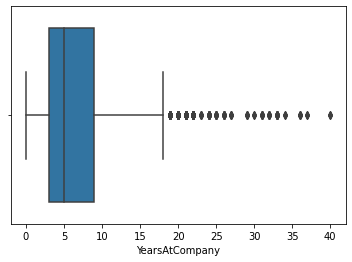

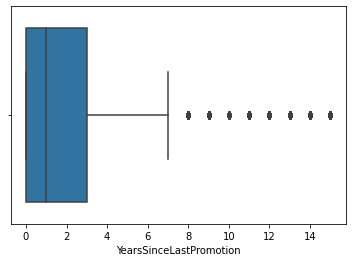

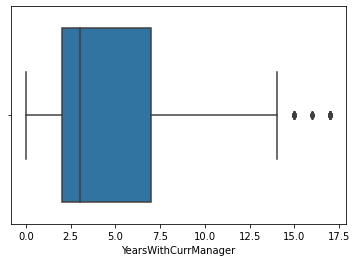

In [10]:
col = ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID','JobLevel','MonthlyIncome', 
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours','StockOptionLevel',
       'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']

for i in col:
    sns.boxplot(df[i])
    plt.show()

Inference from BoxPlots
Ploted Box Plot for all the Continous Variable ( int and float not object type variable)

1. Age, DistanceFromHome, Education, EmployeeID, JobLevel, PercentSalaryHike : Donot have any outlier
2. NumCompaniesWorked, StockOptionLevel has Single Outlier
3. MonthlyIncome has Many Outliers
4. TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion have Moderate Outliers
5. TrainingTimesLastYear, YearsWithCurrManager : Have Some Outliers
6. EmployeeCount , StandardHours : Just have a line ( Irrelevant Columns of DataSet )

Converting Text Column to Categorical Form

In [11]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df['Attrition'] = lab.fit_transform(df['Attrition'])
df['BusinessTravel'] = lab.fit_transform(df['BusinessTravel'])
df['Department'] = lab.fit_transform(df['Department'])
df['Over18'] = lab.fit_transform(df['Over18'])
df['MaritalStatus'] = lab.fit_transform(df['MaritalStatus'])
df['JobRole'] = lab.fit_transform(df['JobRole'])
df['Gender'] = lab.fit_transform(df['Gender'])
df['EducationField'] = lab.fit_transform(df['EducationField'])

In [12]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,1,0,1,131160,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,1,6,2,41890,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,4,7,1,193280,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,3,1,1,83210,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,1,7,2,23420,4.0,0,12,8,2,9.0,2,6,0,4


Droping Irrelevent Columns

In [13]:

df = df.drop(['EmployeeCount','EmployeeID', 'Over18','StandardHours'], axis=1)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [14]:
df.shape

(4410, 20)

#Spliting the Dataset

In [15]:
y = df.iloc[:,1:2]
y.head()

,Attrition
0,0
1,1
2,0
3,0
4,0


In [16]:
x = df.drop(['Attrition'], axis=1)
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [17]:
x.shape

(4410, 19)

#Applying Decision Tree

Target Variable is Attrition which is Binary Categorical ( 0 or 1 )

In [18]:

from sklearn import tree
from sklearn import preprocessing

In [19]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [20]:
df.shape

(4410, 20)

In [21]:
x.shape

(4410, 19)

Train the model using Decision Tree

In [22]:
model = tree.DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Predicting Score

In [23]:
model.score(x,y)

1.0

#Applying Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [26]:
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

Checking Score

In [27]:
rf.oob_score_

0.9997732426303855

Finding Most Relevent Column for predicting Attrition

In [28]:
a = ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome','Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager']
for feature,imp in zip(a, rf.feature_importances_):
    print(feature,"\t\t :",imp);

Age 		 : 0.09759254244969263
BusinessTravel 		 : 0.028687163682160403
Department 		 : 0.02605803529593251
DistanceFromHome 		 : 0.0703982479217055
Education 		 : 0.04048154595815439
EducationField 		 : 0.041856304288730176
Gender 		 : 0.01854190376662305
JobLevel 		 : 0.03722231210487349
JobRole 		 : 0.05588804404853583
MaritalStatus 		 : 0.04033133127083658
MonthlyIncome 		 : 0.09313405163587171
NumCompaniesWorked 		 : 0.05526066779931957
PercentSalaryHike 		 : 0.06663108584068203
StockOptionLevel 		 : 0.03386717199554716
TotalWorkingYears 		 : 0.08501801510452228
TrainingTimesLastYear 		 : 0.04415518326524537
YearsAtCompany 		 : 0.06767407198716978
YearsSinceLastPromotion 		 : 0.04309233669989194
YearsWithCurrManager 		 : 0.05410998488450552


## Inference:
Age, DistanceFromHome, MonthlyIncome, PercentSalaryHike, TotalWorkingYears, YearsAtCompany have value more than 0.05 ie, They are Important feature and affect the prediction of Attrition

Spliting Dataset according to Important Columns

In [29]:
imp = df[['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany']]
imp.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany
0,51,6,131160,11,1.0,1
1,31,10,41890,23,6.0,5
2,32,17,193280,15,5.0,5
3,38,2,83210,11,13.0,8
4,32,10,23420,12,9.0,6


Fitting Decision Tree

In [30]:
model = tree.DecisionTreeClassifier(max_depth=12)
model.fit(imp,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Creating Tree

In [31]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

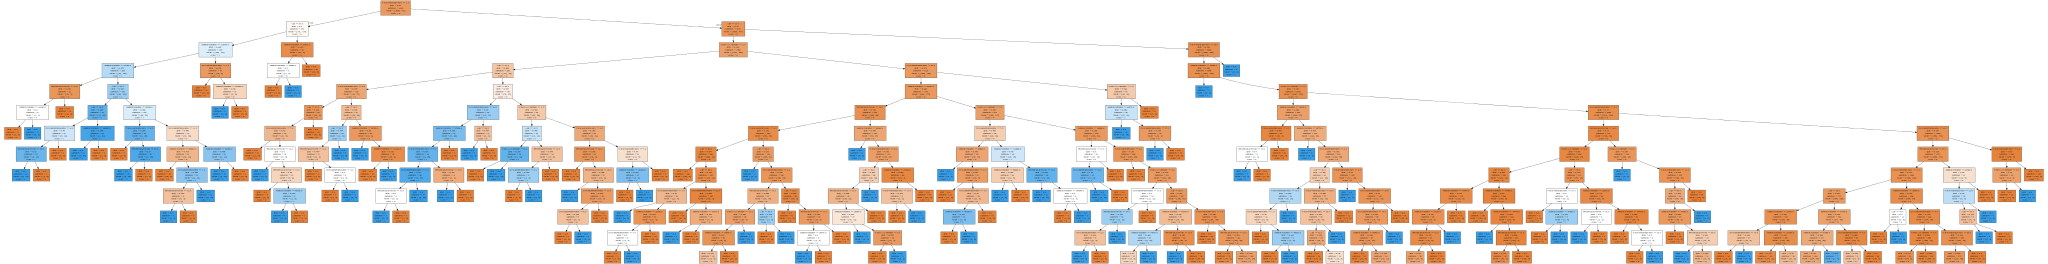

In [32]:
graph = Source(tree.export_graphviz(model, out_file=None, 
                                    feature_names=['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike',
                                                   'TotalWorkingYears','YearsAtCompany'],
                                    class_names=['0','1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

Predicting Score

In [33]:
model.score(imp,y)

0.9480725623582766

# Fitting Random Forest

In [34]:
rf.fit(imp,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
#Accuracy Score
rf.oob_score_

0.999546485260771

# Conclusion:
1. The Accuracy score remains aproximately same in case of Random Forest while predicting on Important Columns than predicting on All Columns.
2. The Data is Not overfitted as in the first case of prediction using Decision Tree ( prediction of all columns : accuracy = 100%)